[LightGBM] [Info] Number of positive: 839, number of negative: 12204
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1682
[LightGBM] [Info] Number of data points in the train set: 13043, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.064326 -> initscore=-2.677308
[LightGBM] [Info] Start training from score -2.677308

Top 20 Important Features (from 16-horse races only):
                Feature  Importance
1                  odds         506
53            speed_mps         417
5          total_weight         347
55  avg_final_time_hist         336
54        avg_speed_mps         326
0            final_time         240
2          horse_weight         238
6                   age         145
3         jockey_weight         131
12                 top3          59
20    weather_weather02          34
15             grade_

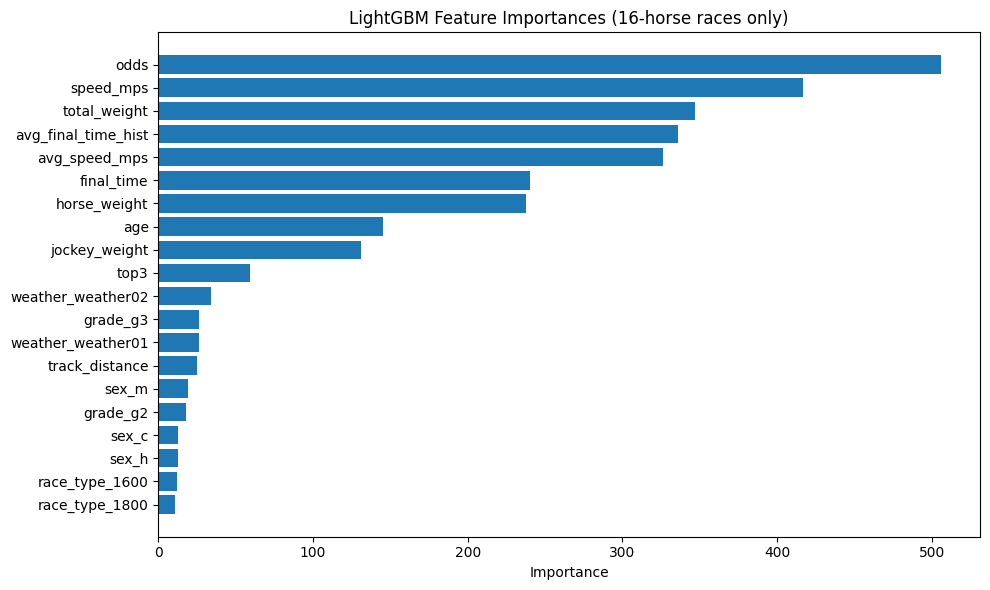

In [23]:
# !pip install lightgbm  # Uncomment if not installed

import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load your file
df = pd.read_csv("../data/cleaned_race_results_for_lightgbm.csv")

# Filter to only races with exactly 16 horses
race_counts = df["race_id"].value_counts()
races_with_16 = race_counts[race_counts == 16].index
df = df[df["race_id"].isin(races_with_16)]

# Define target and feature set
target = "top1"
exclude_cols = ["race_id", "horse_id", "finish_position", "top1"]
features = [col for col in df.columns if col not in exclude_cols]

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM model
model = lgb.LGBMClassifier(objective="binary", is_unbalance=True, random_state=42)
model.fit(X_train, y_train)

# Compute and display feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 20 Important Features (from 16-horse races only):")
print(importance_df.head(20))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"][:20], importance_df["Importance"][:20])
plt.xlabel("Importance")
plt.title("LightGBM Feature Importances (16-horse races only)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
